In [7]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load data
data = load_wine()
X, y = data.data, data.target

random_state = 42
n_estimators = 100

# 1. Decision Tree
dt = DecisionTreeClassifier(min_samples_leaf=3, random_state=random_state)
dt_score = cross_val_score(dt, X, y, cv=5).mean()

# 2. Bagging with Decision Tree
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(min_samples_leaf=3, random_state=random_state),
    n_estimators=n_estimators,
    random_state=random_state
)
bag_score = cross_val_score(bag, X, y, cv=5).mean()


# 3. AdaBoost with Decision Tree (depth=1, SAMME)
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=random_state),
    n_estimators=n_estimators,
    algorithm='SAMME',
    random_state=random_state
)
ada_score = cross_val_score(ada, X, y, cv=5).mean()

# 4. Gradient Boosting (depth=1, learning_rate=1.0, subsample=0.5)
gb = GradientBoostingClassifier(
    max_depth=1,
    min_samples_leaf=3,
    n_estimators=n_estimators,
    learning_rate=1.0,
    subsample=0.5,
    random_state=random_state
)
gb_score = cross_val_score(gb, X, y, cv=5).mean()

print(f"Decision Tree: {dt_score:.4f}")
print(f"Bagging: {bag_score:.4f}")
print(f"AdaBoost: {ada_score:.4f}")
print(f"Gradient Boosting: {gb_score:.4f}")





c:\Users\Szymon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Szymon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Szymon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Szymon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users

Decision Tree: 0.8827
Bagging: 0.9276
AdaBoost: 0.9278
Gradient Boosting: 0.9551


Text(0, 0.5, 'Średnia skuteczność (accuracy)')

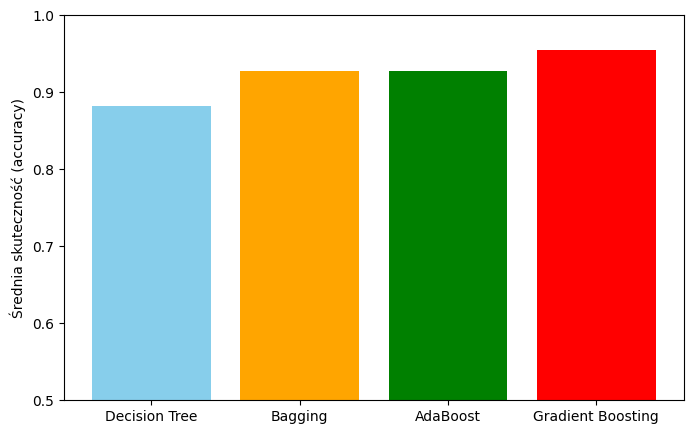

In [8]:
# Nazwy klasyfikatorów i ich wyniki
classifiers = ['Decision Tree', 'Bagging', 'AdaBoost', 'Gradient Boosting']
scores = [dt_score, bag_score, ada_score, gb_score]

plt.figure(figsize=(8, 5))
bars = plt.bar(classifiers, scores, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0.5, 1.0)
plt.ylabel('Średnia skuteczność (accuracy)')